# Class Practice 

In [2]:
import librosa 
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import IPython.display as ipd
import random

# below found from https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5

In [3]:
audio_files = pd.read_csv('../audio_files.csv')

In [67]:
class AudioTransformer:

    max_len = 50000

    def __init__(self, aud):
        self.aud = aud
        self.sig = aud[0]
        self.sr = aud[1]
        self.S_dB = None
        self.augmented_melspec = None

    def open_audio(self):
        self.sig, self.sr = librosa.load(self.aud, sr=22050, mono=True)
        #return (self.sig, self.sr)

    def same_length(self):
        sig_len = len(self.sig)
        
        if (sig_len > self.max_len):
            self.sig = self.sig[:self.max_len]
            
        elif (sig_len < self.max_len):
            diff = self.max_len - sig_len
            for i in range(0, diff):
                self.sig = np.append(self.sig, 0)
        #return (self.sig, self.sr)

    def time_shift(self):
        shift = int(random.random() * len(self.sig))
        self.sig = np.roll(self.sig, shift)
        #return (self.sig, self.sr)
        
    def transpose(self):
        self.sig = librosa.effects.pitch_shift(self.sig, sr=self.sr, n_steps=12,
                                         bins_per_octave=12)
    
    def to_spectrogram(self):
        S = librosa.feature.melspectrogram(y=self.sig, sr=self.sr, n_mels=128, fmax=8000)
        self.S_dB = librosa.power_to_db(S, ref=np.max)
        #return (self.S_dB)

    def aug_sepctrogram(self, max_mask_pct=0.1):
        freq, time = self.S_dB.shape
        self.augmented_melspec = self.S_dB.copy()
        freq_mask_param = max_mask_pct * freq
        time_mask_param = max_mask_pct * time

        # Code copied and edited from 
        # https://www.kaggle.com/code/davids1992/specaugment-quick-implementation
        
        # Frequency masking
        num_freqs_to_mask = int(freq_mask_param * random.uniform(0.5, 1.5))
        f0 = int(np.random.uniform(low = 0.0, high = (freq - num_freqs_to_mask)))
        self.augmented_melspec[:, f0:(f0 + num_freqs_to_mask)] = 0
        # Time masking
        num_frames_to_mask = int(time_mask_param * random.uniform(0.5, 1.5))
        t0 = int(np.random.uniform(low = 0.0, high = (time - num_frames_to_mask))) 
        self.augmented_melspec[t0:(t0 + num_frames_to_mask), :] = 0
        
    


    

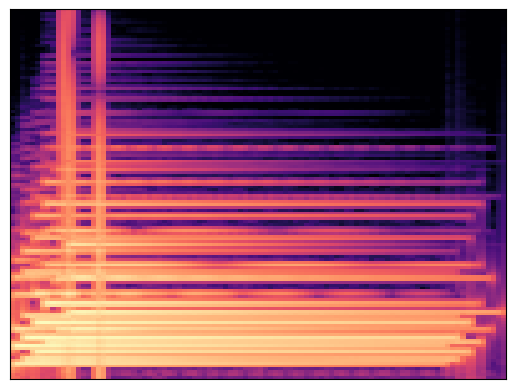

In [68]:
aud = AudioTransformer(f'../audio_files/Major/Major_18.wav')
aud.open_audio()
aud.same_length()
aud.to_spectrogram()
librosa.display.specshow(aud.S_dB, sr=aud.sr);

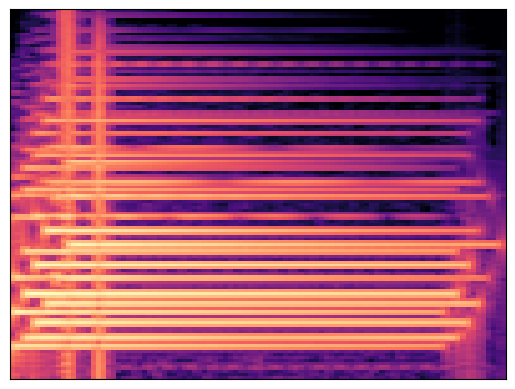

In [69]:
aud = AudioTransformer(f'../audio_files/Major/Major_18.wav')
aud.open_audio()
aud.same_length()
aud.transpose()
aud.to_spectrogram()
librosa.display.specshow(aud.S_dB, sr=aud.sr);

In [71]:
for i in audio_files['chord_qual']:
    if i[:5] == 'Major':
        aud_maj = AudioTransformer(f'../audio_files/Major/{i}')
        aud_maj.open_audio()
        aud_maj.same_length()
        aud_maj.time_shift()
        aud_maj.transpose()
        aud_maj.to_spectrogram()
        #aud_maj.aug_sepctrogram()
        librosa.display.specshow(aud_maj.S_dB, sr=aud_maj.sr);
        plt.savefig(f'../data/major/shft_8va_{i[:-4]}.png')
        plt.close()
    
    if i[:5] == 'Minor':
        aud_min = AudioTransformer(f'../audio_files/Minor/{i}')
        aud_min.open_audio()
        aud_min.same_length()
        aud_min.time_shift()
        aud_min.transpose()
        aud_min.to_spectrogram()
        #aud_min.aug_sepctrogram()
        librosa.display.specshow(aud_min.S_dB, sr=aud_min.sr);
        plt.savefig(f'../data/minor/shft_8va_{i[:-4]}.png')
        plt.close()